In [1]:
import numpy as np
import torch

from train import ALADTrainer
from preprocess import get_svhn

In [2]:
class Args:
    num_epochs=100
    lr=0.0002
    latent_dim=100
    normal_class=1
    batch_size=32
    pretrained=False
    spec_norm=False
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_svhn(args)

alad = ALADTrainer(args, data, device)

Using downloaded and verified file: ./data/svhn/train_32x32.mat


In [3]:
alad.train()

11088/11088: [===============================>] - ETA 0.4sss
Training... Epoch: 0, Discrimiantor Loss: 1.982, Generator Loss: 21.107
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 1, Discrimiantor Loss: 1.156, Generator Loss: 29.986
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 2, Discrimiantor Loss: 0.573, Generator Loss: 37.794
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 3, Discrimiantor Loss: 0.636, Generator Loss: 36.059
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 4, Discrimiantor Loss: 0.477, Generator Loss: 34.553
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 5, Discrimiantor Loss: 0.798, Generator Loss: 32.608
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 6, Discrimiantor Loss: 0.846, Generator Loss: 32.106
11088/11088: [===============================>] - ETA 0.1ss
Training... Epo

11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 62, Discrimiantor Loss: 0.476, Generator Loss: 38.831
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 63, Discrimiantor Loss: 0.557, Generator Loss: 41.619
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 64, Discrimiantor Loss: 0.440, Generator Loss: 39.241
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 65, Discrimiantor Loss: 0.517, Generator Loss: 39.699
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 66, Discrimiantor Loss: 0.532, Generator Loss: 39.428
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 67, Discrimiantor Loss: 0.494, Generator Loss: 40.443
11088/11088: [===============================>] - ETA 0.1ss
Training... Epoch: 68, Discrimiantor Loss: 0.455, Generator Loss: 40.003
11088/11088: [===============================>] - ETA 0.1ss
Training.

In [4]:
import torch

from torch.autograd import Variable

def eval(model):
    labels = []
    scores = []

    model.G.eval()
    model.Dxx.eval()
    model.E.eval()

    with torch.no_grad():
        for img, label in data[1]:
            img = img.float().to(device)
            _, feature_real = model.Dxx(img, img)
            _, feature_gen = model.Dxx(img, model.G(model.E(img)))
            score = torch.sum(torch.abs(feature_real - feature_gen), dim=1)
            scores.append(score.cpu())
            labels.append(label.cpu())
    scores = torch.cat(scores, dim=0)
    labels = torch.cat(labels, dim=0)
    return labels, scores

In [5]:
labels, scores = eval(alad)

In [6]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc

precision, recall, thresholds = precision_recall_curve(labels, scores)

print('ROC AUC score: {:.2f}'.format(roc_auc_score(labels, scores)*100))

ROC AUC score: 67.76


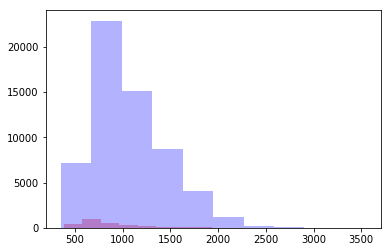

In [8]:
import matplotlib.pyplot as plt

plt.hist(scores[labels==0], color='r', alpha = 0.3)
plt.hist(scores[labels==1], color='b', alpha=0.3)
plt.show()